# Tarea 5 - Grupo 2

## 1. Plot
## 2. Regex

- <a href='#1.1'> 1.1 Replicar el siguiente gráfico (producción de hoja de coca en hectáreas) lo más parecido posible en términos de color de series por paises, diseño de la series, diseño de la leyenda, nota de pie de página y titulo de los ejes pues la disponibilidad de datos es diferente 2009-2020.  </a> 
- <a href='#1.2'> 1.2 Relizar un gráfico similar con los datos de erradicación de hectareas de hoja de Coca. </a> 

- <a href='#1.3'> 1.3 Realizar un gráfico con la producción y erradicación de hoja de coca en el Perú.</a> 

- <a href='#2.1'> 2.1 Usar regex para cambiar el formato de las coordenadas a uno de coordenadas geográficos para metropolitano.xlsx  </a>
- <a href='#2.2'> 2.2 Realizar la siguiente limpieza de datos asi como creación de las variables usando Expresiones Regulares con base_estudiantes.xlsx </a>
- <a href='#2.2.1'> 2.2.1 Limpiar el nombre de los estudiantes </a>
- <a href='#2.2.2'> 2.2.2 Limpiar la fecha de nacimiento y edad. Asimismo, asignar el formato date a la fecha de nacimiento. Crear una variable con el año de nacimiento. </a>
- <a href='#2.2.3'> 2.2.3 Use la variable GENDER para crear una dummy que tome el valor de 1 para female y 0 para males. Similarmente, crear una variable dummy que tome el valor de 1 si el colegio al cual asiste la o el menor es pública, y 0 si es privada. </a>
- <a href='#2.2.4'> 2.2.4 Crear una variable con el usuario del correo electrónico (rmendozam@pucp.edu.pe, usuario : rmendozam)  </a>
- <a href='#2.2.5'> 2.2.5 Crear una variable con el número de DNI del padre, madre o apoderado.</a>
- <a href='#2.2.6'> 2.2.6 La variable observaciones contiene información del nombre y edad correctos del estudiante. Asimismo, tiene información de la cantidad de hermanos, si el menor es beneficiario del programa Juntos o si asiste a una institucón educativa de Jornada Escolar Completa. A partir de la variable observaciones, realizar lo siguiente: </a>
- <a href='#2.2.6.1'> 2.2.6.1 Recuperar el nombre y edad correctos, y reemplazarlo en las variables de nombre (NAME) y edad respectivamente (AGE)  </a>
- <a href='#2.2.6.2'> 2.2.6.2 Crear una variable con la cantidad de hermana/os del estudiante </a>
- <a href='#2.2.6.3'> 2.2.6.3 Crear una variable dummy si el menor es beneficiario del programa Juntos y otra dummy si asiste a un colegio de jornada escolar completa. </a>


In [1]:
#Se importan las librerías necesarias
import pandas as pd
import numpy as np
import re  # for regular expressions (REGEX)
import os  # for directorio
import unidecode # to drop tildes
from datetime import datetime  # library for time
import warnings
import math
warnings.filterwarnings('ignore') 


import pyreadstat  # read .sav files

import seaborn as sns  # seaborn lirbary for plot
import matplotlib.pyplot as plt  # matplot
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


   



## <a id='1.1'> 1.1 Replicar el siguiente gráfico (producción de hoja de coca en hectáreas) lo más parecido posible en términos de color de series por paises, diseño de la series, diseño de la leyenda, nota de pie de página y titulo de los ejes pues la disponibilidad de datos es diferente 2009-2020. </a> 

In [2]:
# Importar base de producción de hoja de coca

b = pd.read_excel("../../data/produccion_coca/6.1.1_-_Illicit_coca_bush_cultivation.xlsx")
b1 = b.iloc[3:6]  ## mantener solo las filas con información de los paises
prod = b1.rename(columns={b1.columns[0]: "pais", b1.columns[1]: "2009", b1.columns[2]: "2010", b1.columns[3]: "2011",
              b1.columns[4]: "2012", b1.columns[5]: "2013", b1.columns[6]: "2014", b1.columns[7]: "2015", 
            b1.columns[8]: "2016", b1.columns[9]: "2017", b1.columns[10]: "2018", b1.columns[11]: "2019",
               b1.columns[12]: "2020"})    ## renombrar a las variables 

## Renombrar las observaciones de la variable pais
renombrar = {3: 'Bolivia', 4: 'Colombia', 5: 'Peru'}

for posicion, nuevo_nombre in renombrar.items():
    prod.at[posicion, 'pais'] = nuevo_nombre


prod

,pais,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3,Bolivia,30900,31000,27200,25300,23000,20400.0,20200.0,23100.0,24500.0,23100.0,25500.0,29400.0
4,Colombia,73000,62000,64000,48000,48000,69000.0,96000.0,146000.0,171000.0,169000.0,154000.0,142800.0
5,Peru,59900,61200,62500,60400,49800,42900.0,40300.0,43900.0,49900.0,54100.0,54700.0,61800.0


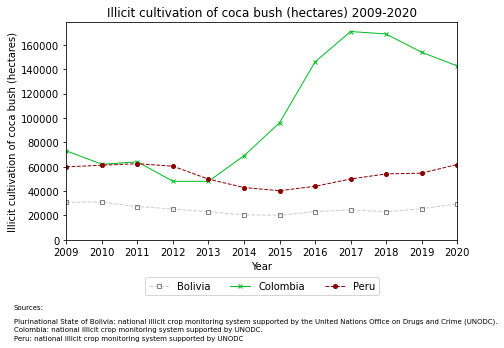

In [3]:
#El index sera pais
prod_transposed = prod.set_index('pais').T

#Se genera el grafico
fig, ax = plt.subplots(figsize=(7, 4))

line_styles = {'Bolivia': {'color': '#CCCCCC', 'marker': 's', 'markeredgecolor': 'gray', 'markerfacecolor': 'none', 'linestyle': '--'},
               'Colombia': {'color': '#02BA26', 'marker': 'x'},
               'Peru': {'color': '#8B0000', 'marker': 'o', 'linestyle': '--'}}

lines = []
for column in prod_transposed.columns:
    line_style = line_styles.get(column, {})
    line = ax.plot(prod_transposed.index, prod_transposed[column],
                   color=line_style.get('color'), marker=line_style.get('marker'),
                   markeredgecolor=line_style.get('markeredgecolor'), markerfacecolor=line_style.get('markerfacecolor'),
                   linewidth=1, linestyle=line_style.get('linestyle', '-'), markersize=4, alpha=1)[0]
    lines.append(line)

ax.set_xmargin(0)
plt.xlabel('Year')
plt.ylabel('Illicit cultivation of coca bush (hectares)')
plt.title('Illicit cultivation of coca bush (hectares) 2009-2020')
plt.ylim(0, None)

#Pie de pagina
ax.text(-0.0975, -0.32, "Sources:", ha='center', fontsize=7, transform=ax.transAxes)
ax.text(0.485, -0.38, "Plurinational State of Bolivia: national illicit crop monitoring system supported by the United Nations Office on Drugs and Crime (UNODC).", ha='center', fontsize=7, transform=ax.transAxes)
ax.text(0.185, -0.42, "Colombia: national illicit crop monitoring system supported by UNODC.", ha='center', fontsize=7, transform=ax.transAxes)
ax.text(0.16, -0.46, "Peru: national illicit crop monitoring system supported by UNODC", ha='center', fontsize=7, transform=ax.transAxes)

#Leyenda personalizada
legend_elements = [Line2D([0], [0], color=line.get_color(), linewidth=line.get_linewidth(),
                          marker=line.get_marker(), markersize=line.get_markersize(),
                          linestyle=line.get_linestyle(), markeredgecolor=line.get_markeredgecolor(),
                          markerfacecolor=line.get_markerfacecolor(), label=column) for line, column in zip(lines, prod_transposed.columns)]
plt.legend(handles=legend_elements, loc='upper center', ncol=len(prod_transposed.columns), bbox_to_anchor=(0.5, -0.15))

#Se guardad el grafico
fig.savefig(r'../../output/plots/plot_illicitCultivationCocaGrupo2Python.png', dpi=800, bbox_inches='tight')

plt.show()



## <a id='1.2'> 1.2 Relizar un gráfico similar con los datos de erradicación de hectareas de hoja de Coca.  </a> 

In [4]:
# Importar base de erradicacion de hoja de coca

b = pd.read_excel(r"../../data/produccion_coca/6.1.2_-_Eradication_of_coca_bush.xlsx")
b1 = b.iloc[1:4]  ## mantener solo las filas con información de los paises
b1.drop(b1.columns[[0,1,3,4,17]], axis=1, inplace=True)

erad = b1.rename(columns={b1.columns[0]: "pais", b1.columns[1]: "2009", b1.columns[2]: "2010", b1.columns[3]: "2011",
              b1.columns[4]: "2012", b1.columns[5]: "2013", b1.columns[6]: "2014", b1.columns[7]: "2015", 
            b1.columns[8]: "2016", b1.columns[9]: "2017", b1.columns[10]: "2018", b1.columns[11]: "2019",
               b1.columns[12]: "2020"})    ## renombrar a las variables 

## Renombrar las observaciones de la variable pais
renombrar = {1: 'Bolivia', 2: 'Colombia', 3: 'Peru'}

for posicion, nuevo_nombre in renombrar.items():
    erad.at[posicion, 'pais'] = nuevo_nombre

erad

,pais,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Bolivia,6341.00,8200.00,10509.00,11044.00,11407.000,11144.0000,11020.000,6577.0,7237.00,11174.00,9205.00,2177.00
2,Colombia,165336.95,145743.69,138503.23,131004.75,69173.469,67234.5178,49967.463,17642.0,52000.67,59977.95,94606.00,130147.33
3,Peru,10025.00,12033.00,10290.00,14171.00,23785.000,31206.0000,35868.000,30151.0,25784.00,25106.67,25526.31,6272.80


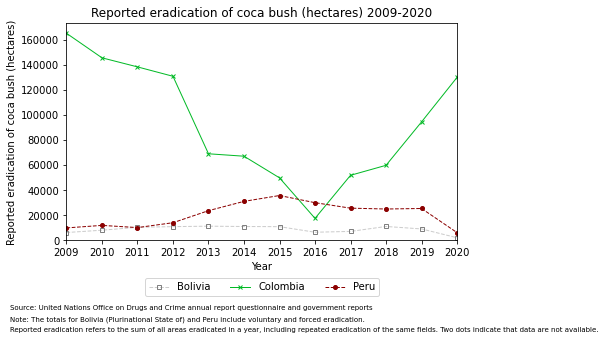

In [5]:
#columna pais sera el indice
erad_transposed = erad.set_index('pais').T

fig, ax = plt.subplots(figsize=(7, 4))

# Se configura el estilo de línea y marcador para cada país
line_styles = {'Bolivia': {'color': '#CCCCCC', 'marker': 's', 'markeredgecolor': 'gray', 'markerfacecolor': 'none', 'linestyle': '--'},
               'Colombia': {'color': '#02BA26', 'marker': 'x'},
               'Peru': {'color': '#8B0000', 'marker': 'o', 'linestyle': '--'}}

# Se grafica las series de tiempo 
lines = []
for column in erad_transposed.columns:
    line_style = line_styles.get(column, {})
    line = ax.plot(erad_transposed.index, erad_transposed[column],
                   color=line_style.get('color'), marker=line_style.get('marker'),
                   markeredgecolor=line_style.get('markeredgecolor'), markerfacecolor=line_style.get('markerfacecolor'),
                   linewidth=1, linestyle=line_style.get('linestyle', '-'), markersize=4, alpha=1)[0]
    lines.append(line)

ax.set_xmargin(0)  
plt.xlabel('Year')
plt.ylabel('Reported eradication of coca bush (hectares)')
plt.title('Reported eradication of coca bush (hectares) 2009-2020')
plt.ylim(0, None)  # ajustar el límite superior del eje y automáticamente

# Leyenda con lo requerido
legend_elements = [Line2D([0], [0], color=line.get_color(), linewidth=line.get_linewidth(),
                          marker=line.get_marker(), markersize=line.get_markersize(),
                          linestyle=line.get_linestyle(), markeredgecolor=line.get_markeredgecolor(),
                          markerfacecolor=line.get_markerfacecolor(), label=column) for line, column in zip(lines, erad_transposed.columns)]
plt.legend(handles=legend_elements, loc='upper center', ncol=len(erad_transposed.columns), bbox_to_anchor=(0.5, -0.15))

# Agregar pie de página
ax.text(0.32, -0.32, "Source: United Nations Office on Drugs and Crime annual report questionnaire and government reports", ha='center', fontsize=7, transform=ax.transAxes)
ax.text(0.31, -0.37, "Note: The totals for Bolivia (Plurinational State of) and Peru include voluntary and forced eradication.", ha='center', fontsize=7, transform=ax.transAxes)
ax.text(0.61, -0.42, "Reported eradication refers to the sum of all areas eradicated in a year, including repeated eradication of the same fields. Two dots indicate that data are not available.", ha='center', fontsize=7, transform=ax.transAxes)

# Se guarda gráfico
fig.savefig(r'../../output/plots/plot_eradicationCocaGrupo2Python.png', dpi=800, bbox_inches='tight')

plt.show()

## <a id='1.3'> 1.3 Realizar un gráfico con la producción y erradicación de hoja de coca en el Perú.  </a> 

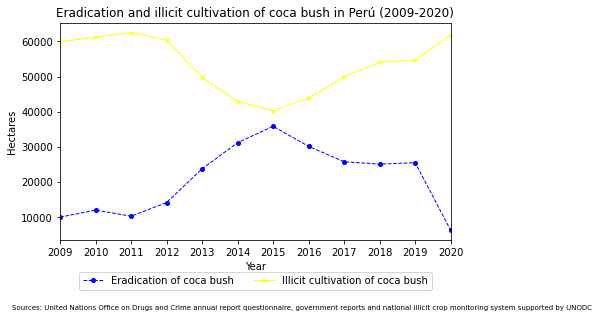

In [6]:
# Filtrar datos para Perú
erad_peru = erad[erad['pais'] == 'Peru']
prod_peru = prod[prod['pais'] == 'Peru']

# Establecer columna pais como el índice
erad_peru.set_index('pais', inplace=True)
prod_peru.set_index('pais', inplace=True)

# Transponer los dataframes
erad_peru_transposed = erad_peru.T
prod_peru_transposed = prod_peru.T

# Crear el gráfico de series de tiempo
fig, ax = plt.subplots(figsize=(7, 4))


line_style_erad = {'color': '#0000FF', 'marker': 'o', 'linestyle': '--'}
line_style_prod = {'color': '#FFFF00', 'marker': 'x'}


line_erad = ax.plot(erad_peru_transposed.index, erad_peru_transposed['Peru'],
                    color=line_style_erad['color'], marker=line_style_erad['marker'],
                    linestyle=line_style_erad['linestyle'], linewidth=1, markersize=4, alpha=1)[0]
line_prod = ax.plot(prod_peru_transposed.index, prod_peru_transposed['Peru'],
                    color=line_style_prod['color'], marker=line_style_prod['marker'],
                    linewidth=1, markersize=4, alpha=1)[0]

ax.set_xmargin(0)
plt.xlabel('Year')
plt.ylabel('Hectares')
plt.title('Eradication and illicit cultivation of coca bush in Perú (2009-2020)')

# Leyenda
legend_elements = [
    Line2D([0], [0], color=line_erad.get_color(), linewidth=line_erad.get_linewidth(),
           marker=line_erad.get_marker(), markersize=line_erad.get_markersize(),
           linestyle=line_erad.get_linestyle(), label='Eradication of coca bush'),
    Line2D([0], [0], color=line_prod.get_color(), linewidth=line_prod.get_linewidth(),
           marker=line_prod.get_marker(), markersize=line_prod.get_markersize(),
           label='Illicit cultivation of coca bush')
]
plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

# Agregar pie de página
ax.text(0.62, -0.32, "Sources: United Nations Office on Drugs and Crime annual report questionnaire, government reports and national illicit crop monitoring system supported by UNODC", ha='center', fontsize=7, transform=ax.transAxes)



# Guardar gráfico
fig.savefig(r'../../output/plots/plot_eradicationcultivationCocaPeruPythonGrupo2.png', dpi=800, bbox_inches='tight')

plt.show()

## <a id='2.1'> 2.1 Usar regex para cambiar el formato de las coordenadas a uno de coordenadas geográficos para metropolitano.xlsx </a> 

In [7]:
#Se lee la base de datos
base1 = pd.read_excel(r"../../data/metropolitano.xlsx")
metropolitano = base1.copy()
metropolitano

,id,id_transport,cod_district,district,transport_type,station_name,sur_latitud,oeste_longitud
0,1,1,150112.0,independencia,metropolitano,E. NARANJAL,"11°58'51.19""S","77° 3'31.63""O"
1,2,1,150112.0,independencia,metropolitano,IZAGUIRRE,"11°59'22.96""S","77° 3'25.30""O"
2,3,1,150112.0,independencia,metropolitano,PACIFICO E1,"11°59'41.19""S","77° 3'21.84""O"
3,4,1,150112.0,independencia,metropolitano,INDEPENDENCIA E1,"11°59'55.00""S","77° 3'18.79""O"
4,5,1,150112.0,independencia,metropolitano,JAZMINES E1,"12° 0'7.88""S","77° 3'17.16""O"
...,...,...,...,...,...,...,...,...
135,154,1,NaN,NaN,alimentador_8,ABTAO,"12° 3'28.98""S","77° 1'20.22""O"
136,155,1,NaN,NaN,alimentador_8,ANDAHUAYLAS,"12° 3'30.81""S","77° 1'34.43""O"
137,156,1,NaN,NaN,alimentador_8,ABANCAY,"12° 3'32.80""S","77° 1'49.73""O"
138,157,1,NaN,NaN,alimentador_8,ESTACIÓN CENTRAL,"12° 3'30.64""S","77° 2'11.10""O"


In [8]:
#Se define la función
def convert_gps(x):
    signo = -1 if re.search('[sswSWoO-]', x) else 1

    regex = re.compile(r'[°\'"]') #Separa en partes si encuentra los caracteres de grados, minutos, segundos
    partes = regex.split(x)
    #Se pone 0 si no hay parte de minutos ni segundos por ejemplo, solo quedaria h. 
    h = float(partes[0])
    m = float(partes[1]) if len(partes) > 1 else 0
    s = float(partes[2]) if len(partes) > 2 else 0

    return signo * (h + m / 60 + s / 3600)
#Se crean nuevas columnas con los valores convertidos en coordenadas geográficas
metropolitano["sur_latitud2"] = metropolitano["sur_latitud"].apply(convert_gps)
metropolitano["oeste_longitud2"] = metropolitano["oeste_longitud"].apply(convert_gps)
metropolitano



,id,id_transport,cod_district,district,transport_type,station_name,sur_latitud,oeste_longitud,sur_latitud2,oeste_longitud2
0,1,1,150112.0,independencia,metropolitano,E. NARANJAL,"11°58'51.19""S","77° 3'31.63""O",-11.980886,-77.058786
1,2,1,150112.0,independencia,metropolitano,IZAGUIRRE,"11°59'22.96""S","77° 3'25.30""O",-11.989711,-77.057028
2,3,1,150112.0,independencia,metropolitano,PACIFICO E1,"11°59'41.19""S","77° 3'21.84""O",-11.994775,-77.056067
3,4,1,150112.0,independencia,metropolitano,INDEPENDENCIA E1,"11°59'55.00""S","77° 3'18.79""O",-11.998611,-77.055219
4,5,1,150112.0,independencia,metropolitano,JAZMINES E1,"12° 0'7.88""S","77° 3'17.16""O",-12.002189,-77.054767
...,...,...,...,...,...,...,...,...,...,...
135,154,1,NaN,NaN,alimentador_8,ABTAO,"12° 3'28.98""S","77° 1'20.22""O",-12.058050,-77.022283
136,155,1,NaN,NaN,alimentador_8,ANDAHUAYLAS,"12° 3'30.81""S","77° 1'34.43""O",-12.058558,-77.026231
137,156,1,NaN,NaN,alimentador_8,ABANCAY,"12° 3'32.80""S","77° 1'49.73""O",-12.059111,-77.030481
138,157,1,NaN,NaN,alimentador_8,ESTACIÓN CENTRAL,"12° 3'30.64""S","77° 2'11.10""O",-12.058511,-77.036417


## <a id='2.2'> 2.2 Realizar la siguiente limpieza de datos asi como creación de las variables usando Expresiones Regulares con base_estudiantes.xlsx </a> 

In [9]:
#Se lee la base de datos
base2 = pd.read_excel(r"../../data/estudiantes/base_students.xlsx")
baseEstudiantes = base2.copy()
baseEstudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones
0,JOAN AYALA FERRERAS --- =9,"23 /08/1998 ""#%",!#10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios
1,JOAN 3 BAEZ TEJADO,22/02/2004 !,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN
2,MARC BASTARDES SOTO -,05 /01/1998,****14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN
4,JOAN ANDREU CRUZ /,27/06/1982 00:00,15,public,m al,anabel@altecom.es,01-156597872,NaN
5,JORDI RAYA 73738 )= GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos"
6,********** ARAN ALVAREZ FERNÁNDEZ,03/09 /1993,!12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN
7,JAVIER BENITEZ JOSE3,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa
8,MARIO PASCUAL FLORES,14/11/1986 00:00,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN
9,JESUS AYALA TORNÉ,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi..."


### <a id='2.2.1'> 2.2.1 Limpiar el nombre de los estudiantes </a> 

In [10]:
#Se define la función que limpiara los nombres
def limpiaNombres(x):
    regex=re.compile('[^a-zA-Z\s]')
    nombreLimpio=regex.sub('',x).strip()
    return nombreLimpio
#Se aplica la función a la columna NAME
baseEstudiantes["NAME"] = baseEstudiantes["NAME"].apply(limpiaNombres)
baseEstudiantes



,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones
0,JOAN AYALA FERRERAS,"23 /08/1998 ""#%",!#10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios
1,JOAN BAEZ TEJADO,22/02/2004 !,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN
2,MARC BASTARDES SOTO,05 /01/1998,****14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN
4,JOAN ANDREU CRUZ,27/06/1982 00:00,15,public,m al,anabel@altecom.es,01-156597872,NaN
5,JORDI RAYA GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos"
6,ARAN ALVAREZ FERNNDEZ,03/09 /1993,!12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN
7,JAVIER BENITEZ JOSE,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa
8,MARIO PASCUAL FLORES,14/11/1986 00:00,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN
9,JESUS AYALA TORN,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi..."


### <a id='2.2.2'> 2.2.2 Limpiar la fecha de nacimiento y edad. Asimismo, asignar el formato date a la fecha de nacimiento. Crear una variable con el año de nacimiento. </a> 

In [11]:
#Se define la función que limpiara la edad
def limpiaEdad(x):
    regex=re.compile('[^0-9]')
    xLimpio=regex.sub('',x).strip()
    return xLimpio
#Se aplica la función a la columna AGE
baseEstudiantes["AGE"] = baseEstudiantes["AGE"].astype(str)
baseEstudiantes["AGE"] = baseEstudiantes["AGE"].map(limpiaEdad)

#Se define la funcion que limpiara la fecha
def limpiaFecha(x):
    xLimpio = re.sub(r'(\d{2})#(\d{1})', r'\1', x)
    xLimpio = re.sub(r'[^0-9/]', '', xLimpio).strip()
    xLimpio = xLimpio[:10]
    return xLimpio
#Se convierte en string    
baseEstudiantes["BORN_DATE"] = baseEstudiantes["BORN_DATE"].astype(str)
#Se aplica la funcion
baseEstudiantes["BORN_DATE"] = baseEstudiantes["BORN_DATE"].map(limpiaFecha)
#Se deshechan los casos no validos
baseEstudiantes["BORN_DATE"] = baseEstudiantes["BORN_DATE"].replace(['000000', '00/00/00', '1000000'], np.nan)
#Se extrae el anio
baseEstudiantes["anio_nacimiento"] = baseEstudiantes["BORN_DATE"].str.extract(r'(\d{4})')
#Se transforma a formato fecha
baseEstudiantes["BORN_DATE"] = pd.to_datetime(baseEstudiantes["BORN_DATE"], dayfirst=True).dt.strftime('%d/%m/%Y')

baseEstudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,anio_nacimiento
0,JOAN AYALA FERRERAS,23/08/1998,10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998
1,JOAN BAEZ TEJADO,22/02/2004,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004
2,MARC BASTARDES SOTO,05/01/1998,14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999
4,JOAN ANDREU CRUZ,27/06/1982,15,public,m al,anabel@altecom.es,01-156597872,NaN,1982
5,JORDI RAYA GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991
6,ARAN ALVAREZ FERNNDEZ,03/09/1993,12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993
7,JAVIER BENITEZ JOSE,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975
8,MARIO PASCUAL FLORES,14/11/1986,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986
9,JESUS AYALA TORN,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993


### <a id='2.2.3'> 2.2.3 Use la variable GENDER para crear una dummy que tome el valor de 1 para female y 0 para males. Similarmente, crear una variable dummy que tome el valor de 1 si el colegio al cual asiste la o el menor es pública, y 0 si es privada. </a> 

In [12]:
#Se convierte ambas variables a string
baseEstudiantes["GENDER"] = baseEstudiantes["GENDER"].astype(str)
baseEstudiantes["TYPE_ADM_SCHOOL"] = baseEstudiantes["TYPE_ADM_SCHOOL"].astype(str)

# Se genera la dummy GENDER

baseEstudiantes['FEMALE'] =  np.where(baseEstudiantes['GENDER'].str.contains('^f|^F', regex=True),
                            1,
                            0)
#Se genera la dummy PUBLICA

baseEstudiantes['PUBLICA'] =  np.where(baseEstudiantes['TYPE_ADM_SCHOOL'].str.contains('^pu', regex=True),
                            1,
                            0)
baseEstudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,anio_nacimiento,FEMALE,PUBLICA
0,JOAN AYALA FERRERAS,23/08/1998,10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998,0,1
1,JOAN BAEZ TEJADO,22/02/2004,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004,0,0
2,MARC BASTARDES SOTO,05/01/1998,14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998,0,1
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999,0,1
4,JOAN ANDREU CRUZ,27/06/1982,15,public,m al,anabel@altecom.es,01-156597872,NaN,1982,0,1
5,JORDI RAYA GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991,0,1
6,ARAN ALVAREZ FERNNDEZ,03/09/1993,12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993,0,1
7,JAVIER BENITEZ JOSE,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975,0,1
8,MARIO PASCUAL FLORES,14/11/1986,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986,0,0
9,JESUS AYALA TORN,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993,0,0


### <a id='2.2.4'> 2.2.4 Crear una variable con el usuario del correo electrónico (rmendozam@pucp.edu.pe, usuario : rmendozam) </a> 

In [13]:
#Se define la función que obtendrá el usuario
def obtieneUsuario(x):
    xLimpio=re.search("(\w+)@",x).group(1)
    return xLimpio
baseEstudiantes["usuario"] = baseEstudiantes["MAIL"].astype(str)
baseEstudiantes["usuario"] = baseEstudiantes["MAIL"].map(obtieneUsuario)

baseEstudiantes



,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,anio_nacimiento,FEMALE,PUBLICA,usuario
0,JOAN AYALA FERRERAS,23/08/1998,10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998,0,1,albatros001
1,JOAN BAEZ TEJADO,22/02/2004,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004,0,0,albert
2,MARC BASTARDES SOTO,05/01/1998,14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998,0,1,alien_10
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999,0,1,amores
4,JOAN ANDREU CRUZ,27/06/1982,15,public,m al,anabel@altecom.es,01-156597872,NaN,1982,0,1,anabel
5,JORDI RAYA GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991,0,1,antig56a
6,ARAN ALVAREZ FERNNDEZ,03/09/1993,12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993,0,1,ballador_rios
7,JAVIER BENITEZ JOSE,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975,0,1,balladora
8,MARIO PASCUAL FLORES,14/11/1986,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986,0,0,barbilla
9,JESUS AYALA TORN,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993,0,0,besugo13


### <a id='2.2.5'> 2.2.5 Crear una variable con el número de DNI del padre, madre o apoderado. </a> 

In [14]:
#Se define la función que extraera el número de DNI de 8 dígitos

def extraerDNI(x):
    dni = re.search(r'(?<=-1)\d+', x).group()
    return dni
baseEstudiantes["numeroDNI"] = baseEstudiantes["DNI_NUMBER"].map(extraerDNI)
baseEstudiantes




,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,anio_nacimiento,FEMALE,PUBLICA,usuario,numeroDNI
0,JOAN AYALA FERRERAS,23/08/1998,10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998,0,1,albatros001,56597865
1,JOAN BAEZ TEJADO,22/02/2004,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004,0,0,albert,56597865
2,MARC BASTARDES SOTO,05/01/1998,14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998,0,1,alien_10,56597872
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999,0,1,amores,56597872
4,JOAN ANDREU CRUZ,27/06/1982,15,public,m al,anabel@altecom.es,01-156597872,NaN,1982,0,1,anabel,56597872
5,JORDI RAYA GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991,0,1,antig56a,56597865
6,ARAN ALVAREZ FERNNDEZ,03/09/1993,12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993,0,1,ballador_rios,56597872
7,JAVIER BENITEZ JOSE,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975,0,1,balladora,56597872
8,MARIO PASCUAL FLORES,14/11/1986,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986,0,0,barbilla,56597872
9,JESUS AYALA TORN,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993,0,0,besugo13,56597865


### <a id='2.2.6'> 2.2.6 La variable observaciones contiene información del nombre y edad correctos del estudiante. Asimismo, tiene información de la cantidad de hermanos, si el menor es beneficiario del programa Juntos o si asiste a una institucón educativa de Jornada Escolar Completa. A partir de la variable observaciones, realizar lo siguiente: </a> 

#### <a id='2.2.6.1'> 2.2.6.1 Recuperar el nombre y edad correctos, y reemplazarlo en las variables de nombre (NAME) y edad respectivamente (AGE) </a> 

In [15]:
# Se define la función que extraerá el nombre correcto de la variable observaciones
def extraerNombreCorrecto(texto):
    regex = r'nombre correcto es ([^\s,:]+(?:\s+[^\s,:]+)*)'
    coincidencia = re.search(regex, texto, re.IGNORECASE)
    nombre_correcto = coincidencia.group(1) if coincidencia else None
    return nombre_correcto

# Aplicar la función a la columna observaciones
baseEstudiantes["nombre_correcto"] = baseEstudiantes["observaciones"].astype(str).apply(extraerNombreCorrecto)
# A mayúsculas
baseEstudiantes["nombre_correcto"] = baseEstudiantes["nombre_correcto"].str.upper()
baseEstudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,anio_nacimiento,FEMALE,PUBLICA,usuario,numeroDNI,nombre_correcto
0,JOAN AYALA FERRERAS,23/08/1998,10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998,0,1,albatros001,56597865,ROBERTO DAGA RIOS
1,JOAN BAEZ TEJADO,22/02/2004,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN,2004,0,0,albert,56597865,None
2,MARC BASTARDES SOTO,05/01/1998,14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998,0,1,alien_10,56597872,None
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN,1999,0,1,amores,56597872,None
4,JOAN ANDREU CRUZ,27/06/1982,15,public,m al,anabel@altecom.es,01-156597872,NaN,1982,0,1,anabel,56597872,None
5,JORDI RAYA GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991,0,1,antig56a,56597865,None
6,ARAN ALVAREZ FERNNDEZ,03/09/1993,12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN,1993,0,1,ballador_rios,56597872,None
7,JAVIER BENITEZ JOSE,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975,0,1,balladora,56597872,None
8,MARIO PASCUAL FLORES,14/11/1986,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN,1986,0,0,barbilla,56597872,None
9,JESUS AYALA TORN,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993,0,0,besugo13,56597865,JESUS MENDIETA JIMENEZ


In [16]:
# Se define la función que extraerá la edad de la variable observaciones
def extraer_edad(texto):
    regex = r'\b(edad)\b\D*(\d+)'
    coincidencia = re.search(regex, texto, flags=re.IGNORECASE)
    edad = coincidencia.group(2) if coincidencia else None
    return edad
    
# Convertir a string y luego aplicar la función a observaciones para poner los resultados en edadCorrecta
baseEstudiantes["observaciones"] = baseEstudiantes["observaciones"].astype(str)
baseEstudiantes["edadCorrecta"] = baseEstudiantes["observaciones"].apply(extraer_edad)

# Reemplazar los valores de NAME y AGE con los valores de nombre_correcto y edadCorrecta
baseEstudiantes["NAME"] = baseEstudiantes["nombre_correcto"].fillna(baseEstudiantes["NAME"])
baseEstudiantes["AGE"] = baseEstudiantes["edadCorrecta"].fillna(baseEstudiantes["AGE"])

baseEstudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,anio_nacimiento,FEMALE,PUBLICA,usuario,numeroDNI,nombre_correcto,edadCorrecta
0,ROBERTO DAGA RIOS,23/08/1998,10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998,0,1,albatros001,56597865,ROBERTO DAGA RIOS,None
1,JOAN BAEZ TEJADO,22/02/2004,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,nan,2004,0,0,albert,56597865,None,None
2,MARC BASTARDES SOTO,05/01/1998,15,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998,0,1,alien_10,56597872,None,15
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,nan,1999,0,1,amores,56597872,None,None
4,JOAN ANDREU CRUZ,27/06/1982,15,public,m al,anabel@altecom.es,01-156597872,nan,1982,0,1,anabel,56597872,None,None
5,JORDI RAYA GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991,0,1,antig56a,56597865,None,None
6,ARAN ALVAREZ FERNNDEZ,03/09/1993,12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,nan,1993,0,1,ballador_rios,56597872,None,None
7,JAVIER BENITEZ JOSE,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975,0,1,balladora,56597872,None,None
8,MARIO PASCUAL FLORES,14/11/1986,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,nan,1986,0,0,barbilla,56597872,None,None
9,JESUS MENDIETA JIMENEZ,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993,0,0,besugo13,56597865,JESUS MENDIETA JIMENEZ,None


#### <a id='2.2.6.2'> 2.2.6.2 Crear una variable con la cantidad de hermana/os del estudiante </a> 

In [17]:
# Se define la función que extraerá el número de hermanos de la variable observaciones
def extraer_numero_hermanos(texto):
    match = re.search(r'tiene (\d+)', texto)
    numero = match.group(1) if match else None
    return int(numero) if numero else None

# Se aplica la función
baseEstudiantes["numeroHermanos"] = baseEstudiantes["observaciones"].map(extraer_numero_hermanos)

# Se convierte a int 
baseEstudiantes["numeroHermanos"] = pd.to_numeric(baseEstudiantes["numeroHermanos"], errors="coerce")
baseEstudiantes["numeroHermanos"] = baseEstudiantes["numeroHermanos"].astype("Int64")

baseEstudiantes

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,anio_nacimiento,FEMALE,PUBLICA,usuario,numeroDNI,nombre_correcto,edadCorrecta,numeroHermanos
0,ROBERTO DAGA RIOS,23/08/1998,10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998,0,1,albatros001,56597865,ROBERTO DAGA RIOS,None,<NA>
1,JOAN BAEZ TEJADO,22/02/2004,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,nan,2004,0,0,albert,56597865,None,None,<NA>
2,MARC BASTARDES SOTO,05/01/1998,15,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998,0,1,alien_10,56597872,None,15,<NA>
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,nan,1999,0,1,amores,56597872,None,None,<NA>
4,JOAN ANDREU CRUZ,27/06/1982,15,public,m al,anabel@altecom.es,01-156597872,nan,1982,0,1,anabel,56597872,None,None,<NA>
5,JORDI RAYA GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991,0,1,antig56a,56597865,None,None,4
6,ARAN ALVAREZ FERNNDEZ,03/09/1993,12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,nan,1993,0,1,ballador_rios,56597872,None,None,<NA>
7,JAVIER BENITEZ JOSE,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975,0,1,balladora,56597872,None,None,<NA>
8,MARIO PASCUAL FLORES,14/11/1986,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,nan,1986,0,0,barbilla,56597872,None,None,<NA>
9,JESUS MENDIETA JIMENEZ,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993,0,0,besugo13,56597865,JESUS MENDIETA JIMENEZ,None,<NA>


#### <a id='2.2.6.3'> 2.2.6.3 Crear una variable dummy si el menor es beneficiario del programa Juntos y otra dummy si asiste a un colegio de jornada escolar completa.</a> 

In [18]:
#Se generan ambas dummys con nuevas columnas segun lo que diga la variable observaciones
baseEstudiantes["beneficiadoJuntos"] = np.where(baseEstudiantes["observaciones"].str.contains("Juntos", regex=False), 1, 0)
baseEstudiantes["asisteIIEEJC"] = np.where(baseEstudiantes["observaciones"].str.contains("jornada completa", regex=True), 1, 0)

baseEstudiantes


,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones,anio_nacimiento,FEMALE,PUBLICA,usuario,numeroDNI,nombre_correcto,edadCorrecta,numeroHermanos,beneficiadoJuntos,asisteIIEEJC
0,ROBERTO DAGA RIOS,23/08/1998,10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios,1998,0,1,albatros001,56597865,ROBERTO DAGA RIOS,None,<NA>,0,0
1,JOAN BAEZ TEJADO,22/02/2004,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,nan,2004,0,0,albert,56597865,None,None,<NA>,0,0
2,MARC BASTARDES SOTO,05/01/1998,15,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15,1998,0,1,alien_10,56597872,None,15,<NA>,0,0
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,nan,1999,0,1,amores,56597872,None,None,<NA>,0,0
4,JOAN ANDREU CRUZ,27/06/1982,15,public,m al,anabel@altecom.es,01-156597872,nan,1982,0,1,anabel,56597872,None,None,<NA>,0,0
5,JORDI RAYA GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos",1991,0,1,antig56a,56597865,None,None,4,1,0
6,ARAN ALVAREZ FERNNDEZ,03/09/1993,12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,nan,1993,0,1,ballador_rios,56597872,None,None,<NA>,0,0
7,JAVIER BENITEZ JOSE,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa,1975,0,1,balladora,56597872,None,None,<NA>,0,1
8,MARIO PASCUAL FLORES,14/11/1986,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,nan,1986,0,0,barbilla,56597872,None,None,<NA>,0,0
9,JESUS MENDIETA JIMENEZ,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi...",1993,0,0,besugo13,56597865,JESUS MENDIETA JIMENEZ,None,<NA>,0,1
